source https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram

### Importing libraries and modules

In [ ]:
# importing libraries and checking the length of the audiofile
import pandas as pd

import soundfile
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa # Librosa is a python library for analyzing and manipulating audio signals.
import librosa.display # to serialize and deserialize Python objects to and from a binary format, allowing them to be saved to and loaded from files or other storage locations.

# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score

#to play audio
import IPython.display as ipd

audio_path = r"C:\Users\Olia\Desktop\Lips Reading\Day3"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ", len(audio_clips))

No. of .wav files in audio folder =  7


### Load audio file and visualize its waveform (using librosa)

<class 'numpy.ndarray'> <class 'int'>
(145676,) 44100


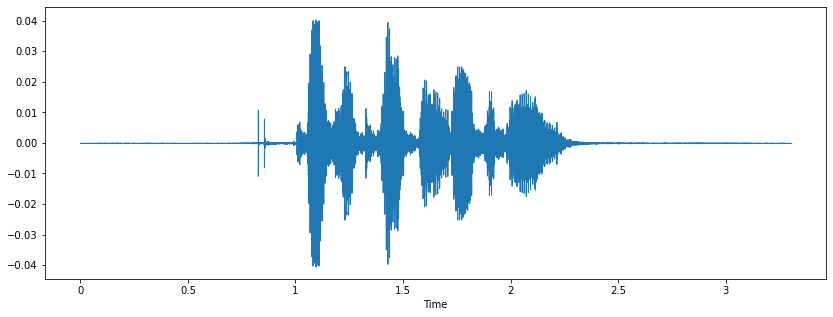

In [33]:
x, sr = librosa.load(audio_path+'\\03-01-01-01-01-01-01.wav', sr=44100)

print(type(x), type(sr))
print(x.shape, sr)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [36]:
x

array([ 6.0059013e-10, -3.2781353e-09,  7.1393367e-09, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [37]:
#play the audio
import IPython
IPython.display.Audio(audio_path+'\\03-01-01-01-01-01-01.wav')

## Convert the audio waveform to spectrogram

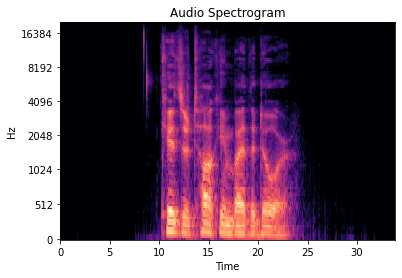

In [181]:
#test # creating and save a spectogram for one audiofiles
y, sr = librosa.load(audio_path+'\\03-01-01-01-01-01-01.wav', sr=44100)
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
plt.title('Audio Spectrogram');
plt.savefig(r'C:\Users\Olia\Desktop\Lips Reading\Day3\Data(audios)\Spectrograms\x.jpeg')

## Cropping the fringes

In [31]:
from PIL import Image
import os
import glob

path_main ='C:\\Users\\Olia\\Desktop\\Lips Reading\\Day3\\Data(audios)\\Train_Data_Spectogram_trimmed' #CHANGE
folders = os.listdir(path_main)
folders

for folder in folders:
    path = path_main + fr'\{folder}'
    os.chdir(path)
    images = glob.glob("*.*") # CHECK the FORMAT
    #print(path.split(r'\')[])
    for image in images:
        
        # Open the image file
        im = Image.open(path + f'\{image}')
        width, height = im.size

        # Define the trim box
        left = width * 0.15
        right = width * 0.9
        top = height * 0.15
        bottom = height * 0.8

        # Crop the image
        im = im.crop((left, top, right, bottom))
        im.save(path + f'\{image}')

In [30]:
images

[]

In [ ]:
#test # creating and save a spectogram for one audiofiles
y, sr = librosa.load(audio_path+'\\03-01-01-01-01-01-01.wav', sr=44100)
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
plt.title('Audio Spectrogram');
plt.savefig(r'C:\Users\Olia\Desktop\Lips Reading\Day3\Data(audios)\Spectrograms\x.jpeg')

KeyboardInterrupt: 

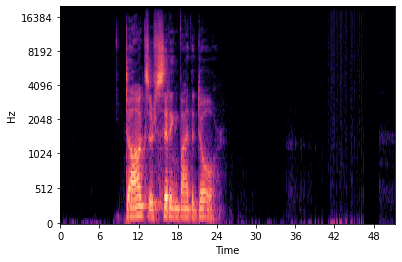

In [185]:
# creating and save spectograms for all audiofiles in a direcrory of choice
for file in audios:
    y, sr = librosa.load(f'{file}', sr=44100)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
    plt.savefig(r'C:\Users\Olia\Desktop\Lips Reading\Day3\Data(audios)\Spectrograms\{name}.jpeg'.format(name=file.split("\\")[-1].split(".")[0]))

The sample rate is the number of samples per second that are used to represent an audio signal. It is typically measured in Hz (hertz).
The standard sample rate for most audio applications is 44.1 kHz (44100 Hz).

## Converting audiodata into dataset

In [70]:
# getting the list of all audiopaths
import os

def list_files(dir):
    audiopaths = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            audiopaths.append(os.path.join(root, name))
    return audiopaths

In [186]:
len(audios)

1440

In [83]:
#calling the function
audios = list_files('C:\\Users\\Olia\\Desktop\\Lips Reading\\Day3\\Data(audios)\\audio_speech_actors_01-24')

In [84]:
# creating a dictionary
audio_data = {}

for file in audios:
    
    key = file.split("\\")[-1].split(".")[0]
    x, sr = librosa.load(file, sr=44100)
    audio_data[key] = x, sr

audio_data    

{'03-01-01-01-01-01-01': (array([ 6.0059013e-10, -3.2781353e-09,  7.1393367e-09, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
  44100),
 '03-01-01-01-01-02-01': (array([ 4.0667528e-06, -6.8895565e-06, -2.5272424e-05, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
  44100),
 '03-01-01-01-02-01-01': (array([ 3.2272452e-05,  2.5749063e-05,  2.3714570e-06, ...,
         -1.2958951e-05, -1.6348582e-05,  0.0000000e+00], dtype=float32),
  44100),
 '03-01-01-01-02-02-01': (array([ 2.9026391e-05,  3.0636802e-05,  3.1879033e-05, ...,
         -1.5954462e-09,  9.2077684e-10,  0.0000000e+00], dtype=float32),
  44100),
 '03-01-02-01-01-01-01': (array([ 2.5720608e-05,  2.2870754e-06, -2.1938358e-06, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
  44100),
 '03-01-02-01-01-02-01': (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  44100),
 '03-01-02-01-02-01-01': (array([ 0.0000000e+00,  0.0000000e+

In [85]:
df = pd.DataFrame.from_dict(audio_data, orient='index')
df

,0,1
03-01-01-01-01-01-01,"[6.0059013e-10, -3.2781353e-09, 7.1393367e-09,...",44100
03-01-01-01-01-02-01,"[4.066753e-06, -6.8895565e-06, -2.5272424e-05,...",44100
03-01-01-01-02-01-01,"[3.227245e-05, 2.5749063e-05, 2.371457e-06, 3....",44100
03-01-01-01-02-02-01,"[2.902639e-05, 3.0636802e-05, 3.1879033e-05, 2...",44100
03-01-02-01-01-01-01,"[2.5720608e-05, 2.2870754e-06, -2.1938358e-06,...",44100
...,...,...
03-01-08-01-02-02-24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100
03-01-08-02-01-01-24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100
03-01-08-02-01-02-24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100
03-01-08-02-02-01-24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100


In [92]:
df.rename(columns={0: 'features', 1: 'weight'}, inplace=True)
df

,features,weight
03-01-01-01-01-01-01,"[6.0059013e-10, -3.2781353e-09, 7.1393367e-09,...",44100
03-01-01-01-01-02-01,"[4.066753e-06, -6.8895565e-06, -2.5272424e-05,...",44100
03-01-01-01-02-01-01,"[3.227245e-05, 2.5749063e-05, 2.371457e-06, 3....",44100
03-01-01-01-02-02-01,"[2.902639e-05, 3.0636802e-05, 3.1879033e-05, 2...",44100
03-01-02-01-01-01-01,"[2.5720608e-05, 2.2870754e-06, -2.1938358e-06,...",44100
...,...,...
03-01-08-01-02-02-24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100
03-01-08-02-01-01-24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100
03-01-08-02-01-02-24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100
03-01-08-02-02-01-24,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",44100


In [98]:
df['features'].str.len()


03-01-01-01-01-01-01    145676
03-01-01-01-01-02-01    147147
03-01-01-01-02-01-01    144204
03-01-01-01-02-02-01    139790
03-01-02-01-01-01-01    155976
                         ...  
03-01-08-01-02-02-24    150090
03-01-08-02-01-01-24    173634
03-01-08-02-01-02-24    175105
03-01-08-02-02-01-24    161862
03-01-08-02-02-02-24    160390
Name: features, Length: 1440, dtype: int64

In [99]:
df['features'][0]


array([ 6.0059013e-10, -3.2781353e-09,  7.1393367e-09, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

2d numpy array(audio_data) 
#list of lists

### Creating a list of lables with emotions

In [168]:
emotion_list = []
for file in audios:
    splited = file.split("\\")[-1].split(".")[0]
    emotion = splited.split('-')[2]
    emotion_list.append(emotion)
labels_list = pd.DataFrame(emotion_list, columns = ["labels"])
labels_list.labels.replace({'01': '01 - neutral', 
                '02': '02 - calm',
                '03': '03 - happy',
                '04': '04 - sad',
                '05': '05 - angry',
                '06': '06 - fearful',
                '07': '07 - disgust',
                '08': '08 - surprised'}, inplace=True)
labels_list

,labels
0,01 - neutral
1,01 - neutral
2,01 - neutral
3,01 - neutral
4,02 - calm
...,...
1435,08 - surprised
1436,08 - surprised
1437,08 - surprised
1438,08 - surprised
